# **Psikolojinin B12'ye Etkisi**

#### İrem Dereli

Proje, bir kişinin B12 seviyesini psikoloji ve zihinsel sağlığına bakarak tespit etmeyi amaçlamaktadır.

### **İçerik**

[Problem](#problem)   
[Verinin Anlaşılması](#data_understanding)   
[Verilerin Hazırlanması](#data_preparation)   
[Modelleme](#modeling)   
[Değerlendirme](#evaluation)   
[Referanslar](#references)   


## **Problem** <a class="anchor" id="problem"></a>

Psikoloji ve zihinsel sağlık sorunları, bu yüzyılda çok yaygın olan sorunlardandır. Ve B12 vitamini eksikliği, anemi, unutkanlık, nörolojik, gastrointestinal problemler vb. gibi büyük sağlık sorunlarına sebep olmaktadır. Psikolojik problemler, çocukluk tramvaları, özel hayat, ailesel sorunlar, iş hayatı ve bunlar gibi sebeplerden ortaya çıkabilmektedir.<br>
Bir kişinin B12 seviyesi düşük, normal veya yüksek olabilir. Tıbbi makalelere bağlı olarak, B12'nin alt limiti 200pg/ml'dir ve 300pg/ml'den düşük olmamalıdır. 300pg/ml'den az değerler B12 için çok düşük seviyelerdir ve bir kişinin günlerce hastanede kalmasına sebep olabilir. Ancak doktorlar, B12 seviyeniz 500pg/ml'den düşük ise oral takviye kullanmanızı önerir.


---

Yukarıda bahsedildiği üzere, B12 seviyesinin sonucu düşük, normal veya yüksek olacaktır. Ve bu, üç kategorili bir sınıflandırma problemidir.

## **Verinin Anlaşılması**<a class="anchor" id="data_understanding"></a>

### Veri İncelemesi

Ulusal Sağlık ve Beslenme İnceleme Anketi (NHANES), www.cdc.gov adresinde çevrimiçi veri kümesi deposudur. 1999 yılından başlayarak, her iki yıl için bir tane olmak üzere toplamda 11 veri kümesi bulunmaktadır. Bu projede seçilen veri kümesi, B12 verisinin fazlalığından dolayı 2013-2014 yıllarındaki veri kümesidir. Ankete katılan toplam kişi sayısı 14,332'dir.

Veri kümesi 5 bölüm içerir. Bunlar demografi, inceleme sonuçları, laboratuvar sonuçları, diyet verileri ve anket sorularıdır. Bu projede demografi, laboratuvar sonuçları ve anket bölümü kullanılacaktır.

Demografi kısmı kişinin kişisel, ailesel ve evsel bilgilerini içermektedir. Cinsiyet ve yaş özellikleri bu kısımdan alınacaktır.

Laboratuvar sonuçları kişinin kan değerlerini içermektedir ve yalnızca B12 değeri kullanılacaktır. Laboratuvar verileri sadece 20 ile 80 yaş aralığındaki insanlar için mevcuttur.

Ve son olarak, anket bölümü zihinsel sağlık taraması, ilişki, aile ve örnek kişi sorularını içerir. Psikoloji, zihinsel sağlık ve ev geliri, uyku bozuklukları gibi psikolojiyle alakalı sorular modelde kullanılacaktır.

In [1]:
# pandas kütüphanesini yükle
import pandas as pd

# veri kümesini yükle
demografi = pd.read_csv('dataset/demographic.csv', index_col=False)
lab = pd.read_csv('dataset/labs.csv', index_col=False)
anket = pd.read_csv('dataset/questionnaire.csv', index_col=False)

### Demografi verisinin incelemesi

In [2]:
demografi.shape

(10175, 47)

Demografi veri kümesinde 47 özellik ve 10175 kayıt bulunmaktadır. Model, bu veri kümesinden yalnızca yaş ve cinsiyeti kullanacaktır.<br>RIAGENDR cinsiyeti, RIDAGEYR yaşı temsil etmektedir.


In [3]:
demografi.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [4]:
# id, cinsiyet ve yaş sütununu al
demografi = demografi[['SEQN', 'RIDAGEYR', 'RIAGENDR']]

# sütunların isimlerini değiştir
demografi.rename(columns={'SEQN': 'ID', 'RIDAGEYR': 'Yas', 'RIAGENDR': 'Cinsiyet'}, inplace=True)

demografi.head()

,ID,Yas,Cinsiyet
0,73557,69,1
1,73558,54,1
2,73559,72,1
3,73560,9,1
4,73561,73,2


Cinsiyet sütununda, 1 erkeği, 2 kadını temsil etmektedir.<br>
Cinsiyet dağılımının görüntülemesi


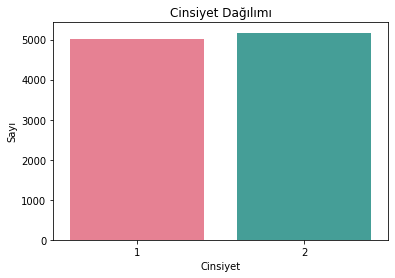

In [5]:
# görüntüleme kütüphanelerini yükle
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(demografi['Cinsiyet'], palette='husl')
plt.ylabel('Sayı')
plt.title('Cinsiyet Dağılımı')
plt.show()

In [6]:
erkek = (demografi['Cinsiyet']==1).sum()
kadın = (demografi['Cinsiyet']==2).sum()

print("Toplam {} erkek katılımcı vardır".format(erkek))
print("Toplam {} kadın katılımcı vardır".format(kadın))

Toplam 5003 erkek katılımcı vardır
Toplam 5172 kadın katılımcı vardır


In [7]:
print("Toplam {} farklı yaş vardır".format(len(demografi['Yas'].unique())))

Toplam 81 farklı yaş vardır


### Laboratuvar verilerinin incelenmesi

In [8]:
lab.shape

(9813, 424)

In [9]:
lab.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


Laboratuvar verisinde 424 özellik ve 9813 kayıt bulunmaktadır. Bu veri kümesinden yalnızca B12 sütunu kullanılacaktır.<br>LBDB12 sütunu B12'yi temsil etmektedir.

In [10]:
# id ve b12 sütunlarını al
lab = lab[['SEQN', 'LBDB12']]

# sütunların isimlerini değiştir
lab.rename(columns={'SEQN': 'ID', 'LBDB12': 'B12'}, inplace=True)

lab.head()

,ID,B12
0,73557,524.0
1,73558,507.0
2,73559,732.0
3,73560,NaN
4,73561,225.0


In [11]:
lab['B12'].dtype

dtype('float64')

B12 verileri ondalıklı sayı olarak tutulmaktadır.

In [12]:
lab['B12'].isnull().sum()

4497

4497 kayıt B12 verisi içermemektedir.

In [13]:
lab['B12'].describe()

count     5316.000000
mean       635.500376
std        716.879853
min         18.000000
25%        381.000000
50%        514.000000
75%        711.000000
max      26801.000000
Name: B12, dtype: float64

Veri kümesindeki maksimum B12 değeri 26801, minimum ise 18'dir. İnsanların ortalama olarak normal B12 değerine sahip olduğunu söyleyebiliriz.

---



### Anket verilerinin incelenmesi

In [14]:
anket.shape

(10175, 953)

Bu veri kümesi, diğerleriyle karşılaştırıldığında daha fazla özellik içermekte. Fakat yukarıda bahsedildiği üzere, sadece zihinsel sağlık ve psikoloji ile alakalı sütunlar seçilecektir.

In [15]:
anket.head()

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


Anket veri kümesinden seçilecek sütunlar aşağıda listelenmiştir.

*   **DPQ010:** Bir şeyler yapma isteğinin az olması
*   **DPQ020:** Keyifsiz, depresif veya umutsuz hissetmek
*   **DPQ030:** Uyumakta veya fazla uyumakta sorun yaşamak
*   **DPQ040:** Yorgun veya az enerjik hissetmek
*   **DPQ050:** İştahsızlık veya aşırı yemek
*   **DPQ060:** Kendin hakkında kötü hissetmek
*   **DPQ070:** Bir şeylere odaklanmakta sorun yaşamak
*   **DPQ080:** Hareket ederken veya konuşurken yavaş olmak veya çok hızlı olmak
*   **DPQ090:** Ölmenin kendi için daha iyi olacağını düşünmek
*   **DPQ100:** İşteki görevlerini yapmakta, evdeki işleri idare etmekte veya insanlarla geçimde ne kadar zorluk yaşıyorsun?
<br><br>
*   **SLQ050:** Hiç doktoruna uyumakta zorlandığını söyledin mi?
*   **SLQ060:** Hiç doktorun uyku bozukluğun olduğunu söyledi mi?
<br><br>
*   **IND235:** Aylık aile geliri



In [16]:
# sütunları al
anket = anket[['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100', 'SLQ050', 'SLQ060', 'IND235']]

# id sütununun ismini değiştir
anket.rename(columns={'SEQN': 'ID'}, inplace=True)

anket.head()

,ID,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,SLQ050,SLQ060,IND235
0,73557,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0
1,73558,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,5.0
2,73559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2.0,10.0
3,73560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
4,73561,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,11.0


Seçilecek sütunlardan biri DPQ020'dir. Katılımcılara 'Keyifsiz, depresif veya umutsuz hissetmek' sorusunu sorar. Bu sütunu inceleyelim. Mental sağlık ile alakalı diğer tüm sütunlar da aynıdır (DPQ ile başlayan sütunlar).

In [17]:
anket['DPQ020'].unique()

array([ 0., nan,  1.,  3.,  2.,  7.,  9.])



*   0: Hiç
*   1: Birkaç gün ara ile
*   2: Günlerin yarısından fazla
*   3: Neredeyse her gün
*   7: Reddedildi
*   9: Bilmiyor
*   Eksik değerler



Bir diğer seçilecek sütun uyku bozukluklarıyla alakalı ve bu sütun da kategorik değerler içermektedir.

In [18]:
anket['SLQ050'].unique()

array([ 1.,  2., nan,  9.])



*   1: Evet
*   2: Hayır
*   9: Bilmiyor



## **Verilerin Hazırlanması** <a class="anchor" id="data_preparation"></a>

Kategorik değer içermeyen yaş sütunu, modele pek bir anlam ifade etmeyecektir. Değerlerin kategorize edilmesi gerekmektedir ve aşağıda listelenmiştir.



*   1: 20 - 29
*   2: 30 - 39
*   3: 40 - 49
*   4: 50 - 59
*   5: 60 - 69
*   6: 70 - 80


In [19]:
# veriyi kategorize et
demografi['Yas'] = pd.cut(demografi['Yas'], bins=[20, 30, 40, 50, 60, 70, 80], labels=[1, 2, 3, 4, 5, 6], include_lowest=True)

demografi.head()

,ID,Yas,Cinsiyet
0,73557,5,1
1,73558,4,1
2,73559,6,1
3,73560,NaN,1
4,73561,6,2


Veri kümesinin boş değer içermesinin sebebi yukarıda bahsedildiği üzere, laboratuvar verisinin yalnızca 20 ile 80 yaş aralığındaki insanları kapsamasından kaynaklanmaktadır. 20 ile 80 yaş aralığının dışındaki insanlar boş değere sahip olacaktır.




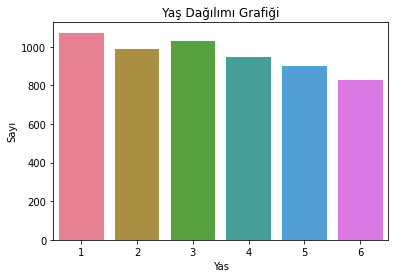

In [20]:
# yaş dağılımının gösterimi
sns.countplot(demografi['Yas'], palette='husl')
plt.ylabel('Sayı')
plt.title('Yaş Dağılımı Grafiği')
plt.show()

Yaşların dağılımı genellikle birbirine yakındır. En fazla katılımın 20-29 yaş aralığından olduğunu söyleyebiliriz. En az katılım da 70-80 yaş aralığındandır.

---



B12 değeri boş olan kayıtlar veri kümesinden atılacaktır. Çünkü model B12 değerini tahmin etme üzerine kurulmuştur.

In [21]:
# B12 sütunundaki değeri boş olan kayıtları at
lab.dropna(axis=0, inplace=True)

lab.shape

(5316, 2)

Boş olan kayıtları attıktan sonra elimizde 5316 kayıt kalmıştır.

Laboratuvar veri kümesinde 424 özellik var. İhtiyacımız olan sadece B12 değeridir. Ve B12 değerleri de aşağıda gösterildiği gibi kategorize edilecektir.


*   Düşük = 1: 0 - 300
*   Normal = 2: 301 - 950
*   Yüksek = 3: 950 - 27000



In [22]:
# veriyi kategorize et
lab['B12'] = pd.cut(lab['B12'], bins=[0, 300, 950, 27000], labels=[1, 2, 3])

lab.head()

,ID,B12
0,73557,2
1,73558,2
2,73559,2
4,73561,1
5,73562,2


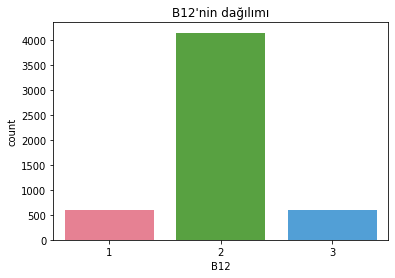

In [23]:
# B12 dağılımını görüntüle
sns.countplot(lab['B12'], label='Toplam', palette='husl')
plt.title('B12\'nin dağılımı')
plt.show()

In [24]:
lab['B12'].value_counts()

2    4141
1     588
3     587
Name: B12, dtype: int64

Grafikten görebileceğimiz üzere, genellikle insanlar normal B12 seviyesine sahiptir. Ancak bu durum, verinin dengeli olmadığını da gösteriyor. Verinin böyle olması, modelin 2. kategoriye meyilli olmasına sebep olacaktır.

Demografi, laboratuvar ve anket bölümlerini birleştirelim.

In [25]:
veri = lab.merge(demografi, on="ID").merge(anket, on="ID")

veri.head()

,ID,B12,Yas,Cinsiyet,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,SLQ050,SLQ060,IND235
0,73557,2,5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0
1,73558,2,4,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,5.0
2,73559,2,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2.0,10.0
3,73561,1,6,2,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,11.0
4,73562,2,4,1,3.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0,0.0,3.0,2.0,1.0,10.0


Id sütunu artık gereksizdir. Veri kümesinden atacağız.

In [26]:
veri.drop('ID', axis=1, inplace=True)

veri.head()

,B12,Yas,Cinsiyet,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,SLQ050,SLQ060,IND235
0,2,5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0
1,2,4,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,5.0
2,2,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2.0,10.0
3,1,6,2,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,11.0
4,2,4,1,3.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0,0.0,3.0,2.0,1.0,10.0


Sütunların değerlerini inceleyelim.

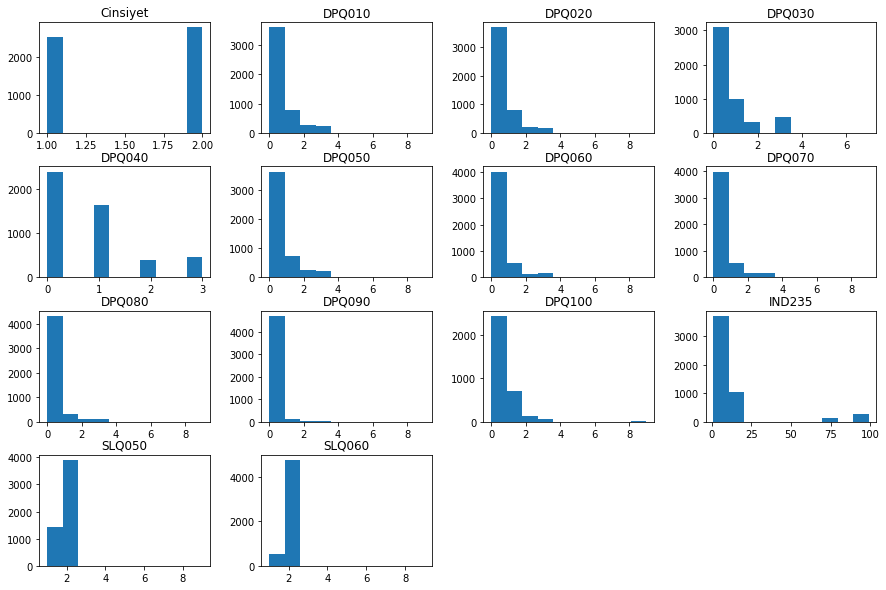

In [27]:
veri.hist(figsize=(15, 10), grid=False)
plt.show()

İnsanların sorulara genelde 'hiç (0)' cevabı verdiğini söyleyebiliriz.

In [28]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5316 entries, 0 to 5315
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   B12       5316 non-null   category
 1   Yas       5316 non-null   category
 2   Cinsiyet  5316 non-null   int64   
 3   DPQ010    4875 non-null   float64 
 4   DPQ020    4873 non-null   float64 
 5   DPQ030    4872 non-null   float64 
 6   DPQ040    4872 non-null   float64 
 7   DPQ050    4872 non-null   float64 
 8   DPQ060    4871 non-null   float64 
 9   DPQ070    4871 non-null   float64 
 10  DPQ080    4871 non-null   float64 
 11  DPQ090    4870 non-null   float64 
 12  DPQ100    3315 non-null   float64 
 13  SLQ050    5316 non-null   float64 
 14  SLQ060    5316 non-null   float64 
 15  IND235    5113 non-null   float64 
dtypes: category(2), float64(13), int64(1)
memory usage: 633.7 KB


Veri kümesinde toplamda 5316 kayıt bulunmakta. Fakat bazı sütunlar boş değerler içermekte. Özellikle, DPQ100 sütunu, diğerleriyle karşılaştırıldığında çok fazla boş değer bulundurmakta. Ortalama değer ile boş değerleri değiştirmek modelin daha kötü çalışmasına sebep olmakta, bu yüzden bu sütunu veri kümesinden atacağız.

In [29]:
veri.drop('DPQ100', axis=1, inplace=True)
veri.head()

,B12,Yas,Cinsiyet,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,SLQ050,SLQ060,IND235
0,2,5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0
1,2,4,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,5.0
2,2,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,10.0
3,1,6,2,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,11.0
4,2,4,1,3.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0,0.0,2.0,1.0,10.0


In [30]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5316 entries, 0 to 5315
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   B12       5316 non-null   category
 1   Yas       5316 non-null   category
 2   Cinsiyet  5316 non-null   int64   
 3   DPQ010    4875 non-null   float64 
 4   DPQ020    4873 non-null   float64 
 5   DPQ030    4872 non-null   float64 
 6   DPQ040    4872 non-null   float64 
 7   DPQ050    4872 non-null   float64 
 8   DPQ060    4871 non-null   float64 
 9   DPQ070    4871 non-null   float64 
 10  DPQ080    4871 non-null   float64 
 11  DPQ090    4870 non-null   float64 
 12  SLQ050    5316 non-null   float64 
 13  SLQ060    5316 non-null   float64 
 14  IND235    5113 non-null   float64 
dtypes: category(2), float64(12), int64(1)
memory usage: 592.1 KB


Sütunu veri kümesinden attıktan sonra, 13 özelliğimiz ve hala boş değerlerimiz bulunmakta. Zihinsel sağlık ile alakalı (DPQ ile başlayan sütunlar) özellikler, diğer özellikler ile karşılaştırıldığında daha önemlidir. Bu yüzden, bu özellikler boş değer içeremez. Zihinsel sağlık özelliklerinde boş değer içeren kayıtlar veri kümesinden atılacaktır.

In [31]:
veri.dropna(subset=['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090'], axis=0, inplace=True)
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 5314
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   B12       4870 non-null   category
 1   Yas       4870 non-null   category
 2   Cinsiyet  4870 non-null   int64   
 3   DPQ010    4870 non-null   float64 
 4   DPQ020    4870 non-null   float64 
 5   DPQ030    4870 non-null   float64 
 6   DPQ040    4870 non-null   float64 
 7   DPQ050    4870 non-null   float64 
 8   DPQ060    4870 non-null   float64 
 9   DPQ070    4870 non-null   float64 
 10  DPQ080    4870 non-null   float64 
 11  DPQ090    4870 non-null   float64 
 12  SLQ050    4870 non-null   float64 
 13  SLQ060    4870 non-null   float64 
 14  IND235    4702 non-null   float64 
dtypes: category(2), float64(12), int64(1)
memory usage: 542.5 KB


Şimdi, 4870 kaydımız ve hala IND235 özelliğinde boş değerlerimiz var. DPQ özellikleri önemli olduğundan dolayı, bu kayıtları veri kümesinden atmayıp, boş değerleri ortalama değer ile değiştireceğiz.

In [32]:
veri['IND235'].describe()

count    4702.000000
mean       13.038707
std        22.309702
min         1.000000
25%         4.000000
50%         7.000000
75%        11.000000
max        99.000000
Name: IND235, dtype: float64

Ortalama değer 6.95 ~ 7'dir. Ayrıca veri kümesinde 77 'reddedildi' ve 99 'bilmiyor' değerlerini temsil etmektedir. Bu değerleri de 7 ile değiştireceğiz.

In [33]:
veri['IND235'].replace({77: 7, 99: 7, None: 7}, inplace=True)

DPQ ve SLQ özelliklerinde de ayrıca 7 reddedildiyi, 9 bilmiyoru temsil etmekte. Bunları da en çok görülen değer (0 = hiç) ile değiştireceğiz.

In [34]:
veri[['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'SLQ050', 'SLQ060']].replace({7: 0, 9: 0})
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 5314
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   B12       4870 non-null   category
 1   Yas       4870 non-null   category
 2   Cinsiyet  4870 non-null   int64   
 3   DPQ010    4870 non-null   float64 
 4   DPQ020    4870 non-null   float64 
 5   DPQ030    4870 non-null   float64 
 6   DPQ040    4870 non-null   float64 
 7   DPQ050    4870 non-null   float64 
 8   DPQ060    4870 non-null   float64 
 9   DPQ070    4870 non-null   float64 
 10  DPQ080    4870 non-null   float64 
 11  DPQ090    4870 non-null   float64 
 12  SLQ050    4870 non-null   float64 
 13  SLQ060    4870 non-null   float64 
 14  IND235    4870 non-null   float64 
dtypes: category(2), float64(12), int64(1)
memory usage: 542.5 KB


Kategori şeklinde tutulan yaş ve B12 sütunlarını, tam sayı şekline çevirelim

In [35]:
veri['B12'] = veri['B12'].astype(int)
veri['Yas'] = veri['Yas'].astype(int)

Şimdi veri kümemiz hazır.

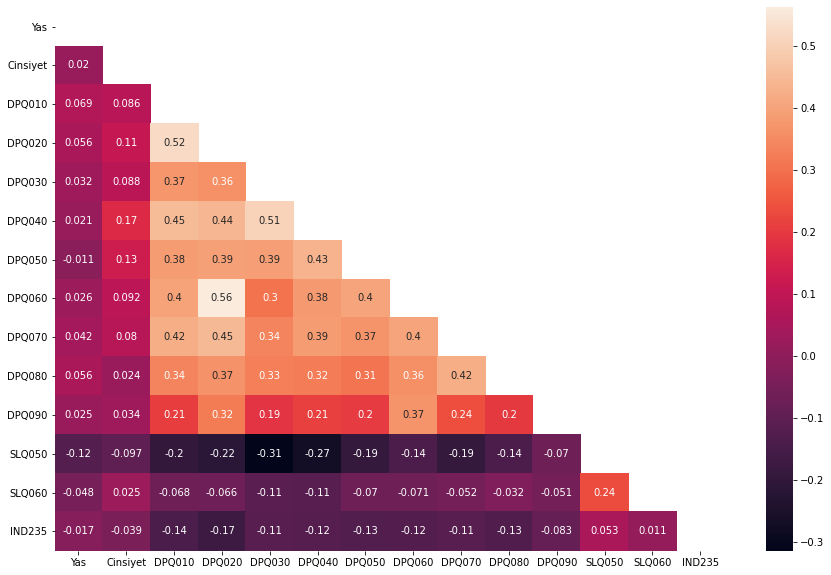

In [36]:
# numpy kütüphanesini yükle
import numpy as np

# grafik büyüklüğü
plt.figure(figsize=(15, 10))

# korelasyon grafiğinin yarısını alabilmek için numpy kütüphanesi ile alt üçgeni alıyoruz
mask = np.triu(veri.iloc[:, 1:].corr())

sns.heatmap(veri.iloc[:, 1:].corr(), annot=True, mask=mask)

# y eksenindeki yazıları yatay yap
plt.yticks(rotation=0)

plt.show()



*   DPQ ile başlayan sütunların birbirleriyle pozitif ve diğer sütunlarla kıyaslandığında yüksek korelasyona sahip olduğunu söyleyebiliriz.
*   SLQ ile başlayan sütunların yüksek korelasyona sahip olmadığını ve pozitif korelasyona sahip olduğunu ancak cinsiyet hariç diğer tüm sütunlarla negatif korelasyona sahip olduğunu görebiliyoruz (SLQ050 sütunu cinsiyetle de negatif korelasyona sahip).
*   Toplam aylık gelirin diğer sütunlarla bir korelasyona sahip olmadığını görebiliyoruz.


## **Modelleme** <a class="anchor" id="modeling"></a>

### Dengesiz Veri İçin

In [37]:
# model kütüphanelerini yükle
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.pipeline import Pipeline
from sklearn.utils.extmath import density

from sklearn import metrics

# veriyi özellikler ve hedef olarak ayır
X = veri.iloc[:, 1:15]
y = veri.iloc[:, 0]

# test ve eğitim verisi olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True) # 70% eğitim ve 30% test

Benchmark sınıflandırması, farklı algoritmaların sonuçlarını karşılaştırmamızı sağlayan bir fonksiyondur.

In [38]:
from time import time
# Benchmark sınıflandırması
def benchmark(clf, X_train, y_train, X_test, y_test):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

    print("classification report:")
    print(metrics.classification_report(y_test, pred))

    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))

    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time

In [39]:
# Farklı algoritmalar
results = []
for clf, name in (
        (tree.DecisionTreeClassifier(), "Decision Tree"),
        (RandomForestClassifier(n_estimators=100), "Random Forest"),
        (GaussianNB(), "Gauissian Naive Bayes"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (LogisticRegression(), "Logistic Regression"),
        (svm.SVC(), "Support Vector Machines"),
    ):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf, X_train, y_train, X_test, y_test))


Decision Tree
________________________________________________________________________________
Training: 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
train time: 0.019s
test time:  0.002s
accuracy:   0.641
classification report:
              precision    recall  f1-score   support

           1       0.10      0.10      0.10       169
           2       0.78      0.80      0.79      1116
           3       0.19      0.15      0.16       176

    accuracy                           0.64      1461
   macro avg       0.35      0.35      0.35      1461
weighted avg       0.63      0.64      0.63      1461

confusi

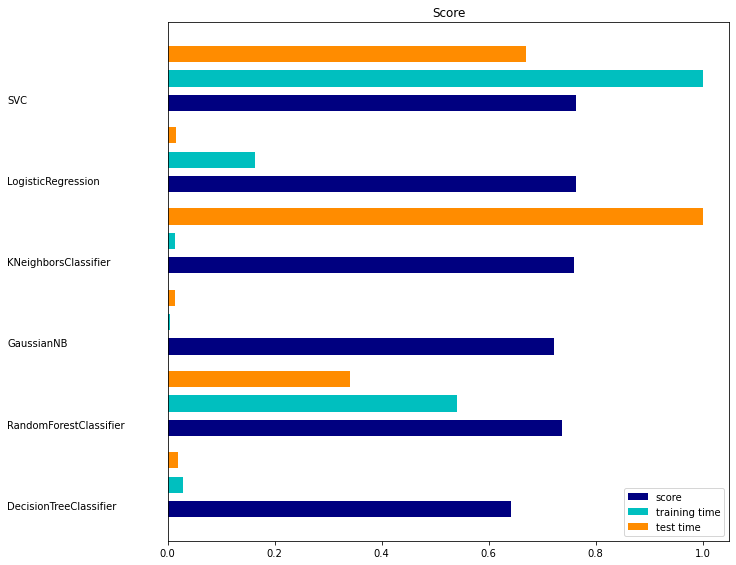

In [40]:
# grafikler

indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

Modellerin doğruluk oranı karşılaştırıldığında, en yüksek doğruluk oranına sahip iki algoritma Logistic Regression ve Support Vector Classifier olduğunu, fakat 'precision', 'recall', 'f1score' değerlerini göz önüne aldığımız zaman, çok başarılı modeller olmadığını, yalnızca 'Normal' değerli B12 tahmini yaptığını görebiliyoruz. Bu yüzden, bu iki modelle karşılaştırdığımızda doğruluk oranı çok da farklı olmayan, ancak diğer kategorilere de tahmin yapan Gaussian Naive Bayes algoritmasını projemizde kullanacağız.

Gaussian Naive Bayes algoritmasında 'hyperparameters' yapılamadığı için Grid Search kullanamıyoruz. Bunun yerine, Naive Bayes'ten sonra gelen en iyi model olan Random Forest'ta daha iyi sonuç alıp alamayacağımızı görmek açısından Grid Search algoritmasını deniyoruz.

In [41]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier(random_state=1, n_estimators = 10, min_samples_split = 1)

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 28.4min finished


In [42]:
# modelin en iyi çalıştığı parametreler
gridF.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [43]:
gridF.refit
preds = gridF.predict(X_test)
probs = gridF.predict_proba(X_test)

# doğruluk oranı
np.mean(preds == y_test)

0.7638603696098563

In [44]:
print(metrics.classification_report(y_test, preds, target_names=['Düşük', 'Normal', 'Yüksek']))

precision    recall  f1-score   support

       Düşük       0.00      0.00      0.00       169
      Normal       0.76      1.00      0.87      1116
      Yüksek       0.00      0.00      0.00       176

    accuracy                           0.76      1461
   macro avg       0.25      0.33      0.29      1461
weighted avg       0.58      0.76      0.66      1461



Grid Search sonucunda, doğruluk oranının %3 arttığını, ancak sınıflandırma raporunda negatif bir etkiye sebep olduğunu görüyoruz. Düşük ve yüksek B12 kategorilerini (1 ve 3) tahmin edemediğini görüyoruz. Bu yüzden, Naive Bayes algoritmasıyla devam ediyoruz.

### Dengeli Veri İçin

Verimizde "Normal" B12 değerine sahip olan katılımcıların çok daha fazla olduğunu yukarıda görmüştük. Bu yüzden, kategorileri daha dengeli hale getirip, modelimizi tekrar oluşturacağız. Diğer kategorilerde yaklaşık 530 veri bulunmakta. Normal kategoriden 1000 tane veri seçiyoruz. Bunun sebebi de, çok fazla veri kaybetmek istemememiz.

In [45]:
dengeli_veri = veri.copy()

dengeli_veri[dengeli_veri['B12'] == 2] = dengeli_veri[dengeli_veri['B12'] == 2].sample(1000, random_state=42)
dengeli_veri = dengeli_veri[dengeli_veri['B12'].notnull()]
dengeli_veri['B12'].value_counts()


2.0    1000
1.0     536
3.0     529
Name: B12, dtype: int64

In [46]:
# veriyi özellikler ve hedef olarak ayır
X_dengeli = dengeli_veri.iloc[:, 1:15]
y_dengeli = dengeli_veri.iloc[:, 0]

# test ve eğitim verisi olarak böl
X_train_dengeli, X_test_dengeli, y_train_dengeli, y_test_dengeli = train_test_split(X_dengeli, y_dengeli, test_size=0.3, random_state=42, shuffle=True) # 70% training and 30% test

In [47]:
results_dengeli = []
for clf, name in (
        (tree.DecisionTreeClassifier(), "Decision Tree"),
        (RandomForestClassifier(n_estimators=100), "Random Forest"),
        (GaussianNB(), "Gauissian Naive Bayes"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (LogisticRegression(), "Logistic Regression"),
        (svm.SVC(), "Support Vector Machines"),
    ):
    print('=' * 80)
    print(name)
    results_dengeli.append(benchmark(clf, X_train_dengeli, y_train_dengeli, X_test_dengeli, y_test_dengeli))

Decision Tree
________________________________________________________________________________
Training: 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
train time: 0.011s
test time:  0.002s
accuracy:   0.371
classification report:
              precision    recall  f1-score   support

         1.0       0.22      0.27      0.24       145
         2.0       0.48      0.49      0.48       288
         3.0       0.35      0.26      0.30       187

    accuracy                           0.37       620
   macro avg       0.35      0.34      0.34       620
weighted avg       0.38      0.37      0.37       620

confusi

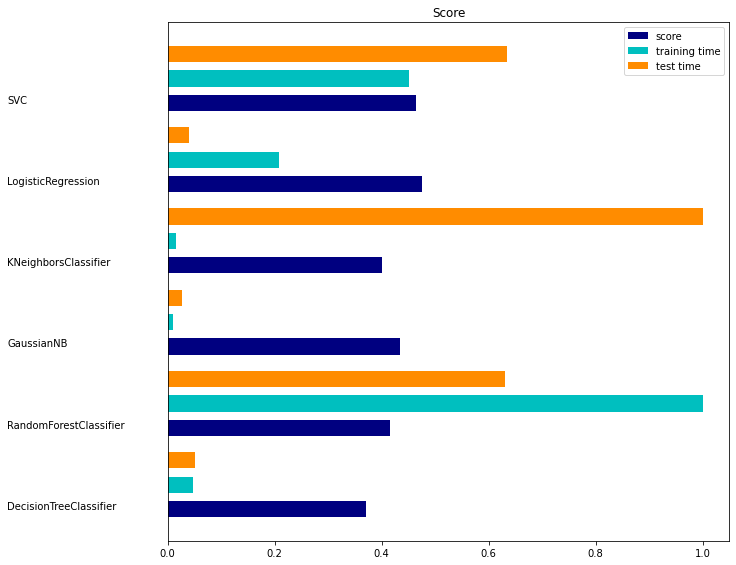

In [48]:
# grafikleri çıkar

indices = np.arange(len(results_dengeli))

results_dengeli = [[x[i] for x in results_dengeli] for i in range(4)]

clf_names, score, training_time, test_time = results_dengeli
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

Doğruluk oranı, dengesiz veriye göre daha düşüktür. Yine doğruluk oranı, f1score, recall ve precision değerlerini göz önüne aldığımızda Gaussian Naive Bayes algoritmasının daha iyi çalıştığını görebiliyoruz.

In [49]:
gridF_dengeli = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF_dengeli = gridF_dengeli.fit(X_train_dengeli, y_train_dengeli)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  5.9min finished


In [50]:
gridF_dengeli.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 100,
 'n_estimators': 300}

In [51]:
gridF_dengeli.refit
preds = gridF_dengeli.predict(X_test_dengeli)
probs = gridF_dengeli.predict_proba(X_test_dengeli)

# doğruluk oranı
np.mean(preds == y_test_dengeli)

0.47580645161290325

In [52]:
print(metrics.classification_report(y_test_dengeli, preds, target_names=['Düşük', 'Normal', 'Yüksek']))

precision    recall  f1-score   support

       Düşük       0.00      0.00      0.00       145
      Normal       0.47      0.98      0.64       288
      Yüksek       0.61      0.07      0.13       187

    accuracy                           0.48       620
   macro avg       0.36      0.35      0.26       620
weighted avg       0.40      0.48      0.34       620



Dengesiz veri setinde olduğu gibi, doğruluk oranımız yaklaşık %6 arttırış gösterdi ancak sınıflandırma raporumuza negatif bir etkisi oldu. 

## **Değerlendirme** <a class="anchor" id="evaluation"></a>

In [53]:
model = GaussianNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("Doğruluk oranımız {}".format(metrics.accuracy_score(y_test, pred)))
print(metrics.classification_report(y_test, pred, target_names=['Düşük', 'Normal', 'Yüksek']))

Doğruluk oranımız 0.7214236824093087
              precision    recall  f1-score   support

       Düşük       0.12      0.04      0.05       169
      Normal       0.77      0.93      0.84      1116
      Yüksek       0.19      0.07      0.10       176

    accuracy                           0.72      1461
   macro avg       0.36      0.34      0.33      1461
weighted avg       0.62      0.72      0.66      1461



Hatırlama, bir sınıflandırma modelinin ilgili tüm örnekleri belirleme yeteneğidir. Hatırlamanın sadece normal B12 değerleri için iyi olduğunu görebiliriz. Model düşük ve yüksek değerler için çok başarılı değildir.

Hassasiyet, bir sınıflandırma modelinin yalnızca ilgili örnekleri döndürme becerisidir. Modelimiz normal değerlerde çok başarılı, ancak düşük ve yüksek değerlerde çok başarılı değildir.

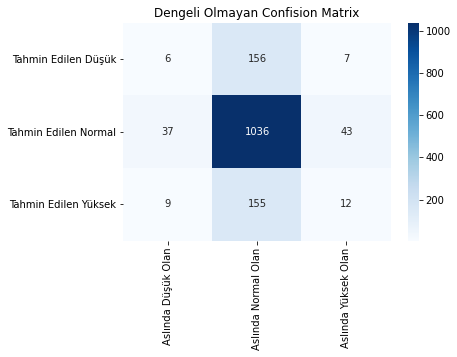

In [54]:
rslt = metrics.confusion_matrix(y_test, pred)
sns.heatmap(pd.DataFrame(rslt, index=['Tahmin Edilen Düşük', 'Tahmin Edilen Normal', 'Tahmin Edilen Yüksek'], columns=['Aslında Düşük Olan', 'Aslında Normal Olan', 'Aslında Yüksek Olan']), annot=True, fmt='d', cmap='Blues')
plt.title('Dengeli Olmayan Confision Matrix')
plt.show()

Konfeksiyon matrisi, modelin normal değerleri daha fazla tahmin etme eğiliminde olduğunu göstermektedir. Bunun nedeni verilerin dengesiz olması ve normal değerlerin diğerlerinden çok daha fazla olmasıdır. Gördüğümüz gibi, model aslında düşük veya yüksek olan 80 değeri normal olarak tahmin ediyor.

In [55]:
model.fit(X_train_dengeli, y_train_dengeli)
pred_dengeli = model.predict(X_test_dengeli)

print("Dengeli veri seti için doğruluk oranımız {}".format(metrics.accuracy_score(y_test_dengeli, pred_dengeli)))
print(metrics.classification_report(y_test_dengeli, pred_dengeli, target_names=['Düşük', 'Normal', 'Yüksek']))

Dengeli veri seti için doğruluk oranımız 0.4338709677419355
              precision    recall  f1-score   support

       Düşük       0.24      0.12      0.16       145
      Normal       0.52      0.58      0.55       288
      Yüksek       0.38      0.45      0.41       187

    accuracy                           0.43       620
   macro avg       0.38      0.38      0.37       620
weighted avg       0.41      0.43      0.42       620



Hatırlama, bir sınıflandırma modelinin ilgili tüm örnekleri belirleme yeteneğidir. Dengeli verilerde hatırlama, dengesiz verilerin hatırlamasından daha iyi görünüyor. Yüksek değerler şimdi daha iyi hatırlama yüzdesine sahip, normal hala iyi. Düşük daha iyi olabilirdi.

Hassasiyet, bir sınıflandırma modelinin yalnızca ilgili örnekleri döndürme becerisidir. Dengeli verilerin hassasiyeti, dengesiz verilerin kesinliğinden çok daha iyidir. Tüm kategoriler artık kabul edilebilir hassasiyetlere sahiptir.

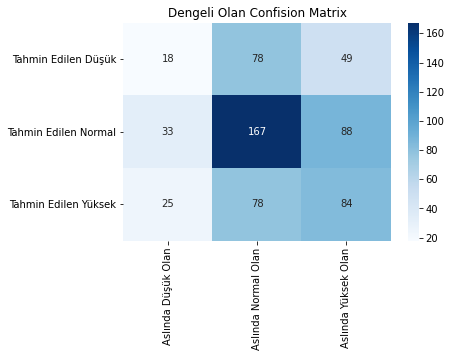

In [56]:
rslt_dengeli = metrics.confusion_matrix(y_test_dengeli, pred_dengeli)
sns.heatmap(pd.DataFrame(rslt_dengeli, index=['Tahmin Edilen Düşük', 'Tahmin Edilen Normal', 'Tahmin Edilen Yüksek'], columns=['Aslında Düşük Olan', 'Aslında Normal Olan', 'Aslında Yüksek Olan']), annot=True, fmt='d', cmap='Blues')
plt.title('Dengeli Olan Confision Matrix')
plt.show()

Dengeli verilerle elde edilen sonuç, modelin normal değerleri daha fazla tahmin etme eğiliminde olmadığını göstermektedir. Tüm değerleri tahmin eder, ancak doğruluk oranı kötü olduğu için daha fazla yanlış tahminde bulunur.

---


İki sonucu karşılaştırdığımız zaman, doğruluk oranının dengesiz veri seti için daha iyi olduğunu, ancak sınıflandırma raporuna baktığımız zaman dengeli veri setinin daha iyi olduğunu görebiliyoruz. 

## **Referanslar**<a class="anchor" id="references"></a>



*   https://github.com/Jean-njoroge/Breast-cancer-risk-prediction
*   https://dizziness-and-balance.com/disorders/central/b12.html



**Disclaimer!** <font color='grey'>This notebook was prepared by İrem Dereli as a term project for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>